In [1]:
from MRF import *
import numpy as np
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1qYigHu6mygtmxceLTGACV206u7RQsopq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col = "Unnamed: 0").reset_index(drop = True)

In [3]:
df.head(5)

,PAYEMS,PAYEMS.l1,F_1.l1,F_2.l1,F_3.l1,F_4.l1,F_5.l1,MAF_1.l1,MAF_2.l1,MAF_3.l1,trend
0,0.000079,0.000781,-3.448621,-3.757808,2.135087,6.158099,-0.756587,-24.430689,23.652427,-11.180313,1
1,-0.000571,0.000079,-2.437831,1.538254,-1.779137,9.956491,-0.705905,-25.743333,23.104332,-11.575205,2
2,-0.000354,-0.000571,-5.140423,0.261719,-1.144619,7.897809,-0.525376,-27.532826,22.534573,-12.688364,3
3,-0.001737,-0.000354,-4.333899,3.133827,-1.938026,8.523099,-0.204046,-29.392758,21.758538,-13.359394,4
4,-0.001283,-0.001737,-4.135100,0.606762,-0.008077,-0.908704,-1.573666,-31.232862,21.071040,-14.412521,5


In [4]:
### Dependent Variable
my_var = "PAYEMS"
y_pos = df.columns.get_loc(my_var)

### Exogenous Variables
x_vars = ["PAYEMS.l1", 'F_1.l1', 'F_2.l1', 'F_3.l1', 'MAF_1.l1', 'MAF_2.l1', 'MAF_3.l1']
x_pos = [df.columns.get_loc(x) for x in x_vars]

### Forecast Horizon
hor = 1

In [5]:
np.random.seed(1234)

In [6]:
MRF = MacroRandomForest(data = df,
                        y_pos = y_pos,
                        x_pos = x_pos, 
                        B = 250, 
                        ridge_lambda=0.3,
                        parallelise = True,
                        n_cores = -1,
                        oos_pos = np.arange(len(df)- 1, len(df)),
                        trend_push = 6,
                        quantile_rate = 0.3, 
                        fast_rw = True)

In [7]:
MRF_output = MRF._ensemble_loop()

In [8]:
pred = float(MRF_output['pred'].values)

In [9]:
pred

0.003658301775620995

In [10]:
y = float(149629 * np.cumprod(np.exp(pred)) - 149629)

In [11]:
y

548.3905137793045

In [12]:
d = [149629 * np.exp(float(value)) - 149629 for value in MRF_output['pred_ensemble']]

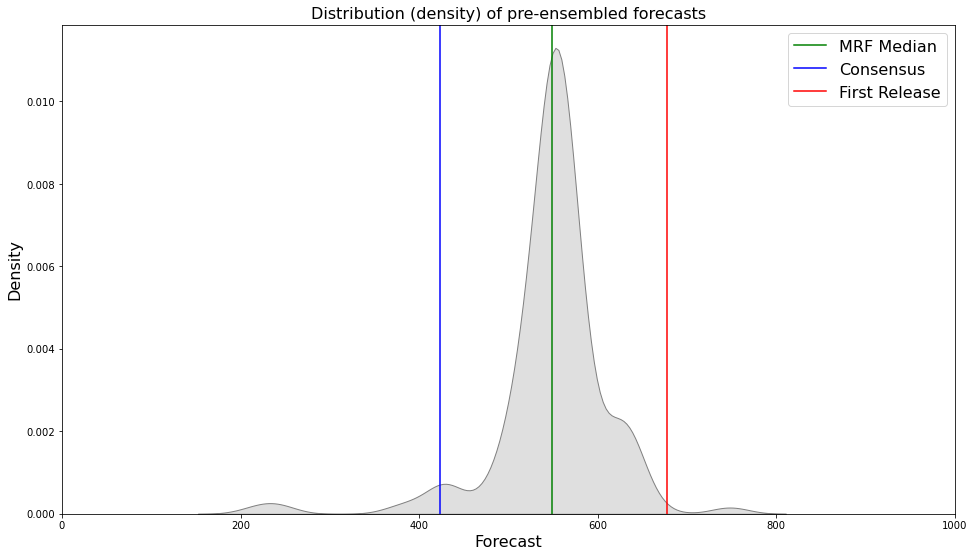

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(d, ax = ax, color = 'grey', shade = True)

fig.set_size_inches([16, 9])
ax.set_xlabel("Forecast", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
ax.set_xlim([0, 1000])
ax.axvline(y, color = 'green', label = "MRF Median")
ax.axvline(423, color = 'blue', label = "Consensus")
ax.axvline(678, color = 'red', label = "First Release")
ax.set_title("Distribution (density) of pre-ensembled forecasts", fontsize = 16)
ax.legend(fontsize = 16)

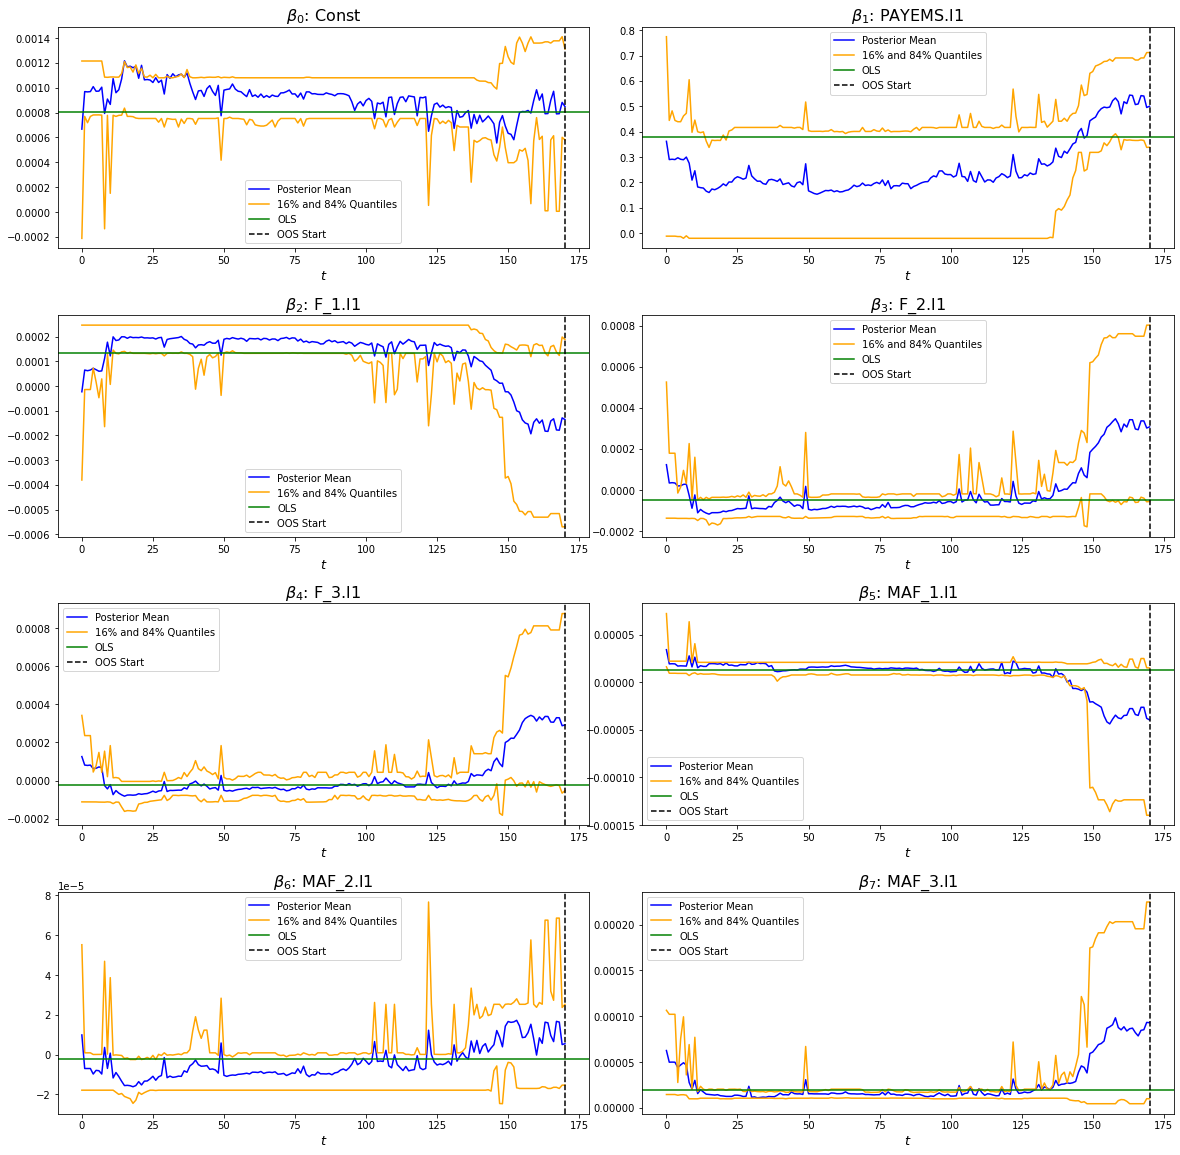

In [14]:
MRF.band_plots()